# UK E-Commerce Data Analysis (Python Project)

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Glance at the Dataset

In [85]:
df = pd.read_csv("data.csv", encoding='ISO-8859-1')

`encoding='ISO-8859-1'` is used to properly decode the file because it contains special characters that cannot be handled by the default UTF-8 encoding.

In [86]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


The column `InvoiceDate` is stored in a string format, which needs to be converted to a datetime format.

In [88]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [89]:
type(df['InvoiceDate'][1])

pandas._libs.tslibs.timestamps.Timestamp

This is to double-check that the column has been converted to a datetime format.

In [90]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

This dataset consists of 8 columns and 541909 entries. It has 1454 missing values in the `Description` column, which represents only 0.27% of the data, so these can be safely ignored. The `CustomerID` column has 135,080 missing values, making up about 25% of the dataset.

Since I am starting with a product analysis and a sales trend analysis first, which are not significantly affected by missing `CustomerID` values, I will keep these entries in the dataset for now.

However, when it comes to customer analysis, the missing values will prove to be a problem as they could skew the results. At that point, I’ll remove rows with missing CustomerID to ensure the analysis is accurate.

In [91]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


I am now diving deeper into the non-positive `Quantity` and `UnitPrice` values.

In [92]:
df[df['Quantity'] <= 0] 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


Some negative values for `Quantity` are found, which typically represent returned items. This is something to bear in mind during the course of analysis. 

In [93]:
df[df['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


Accounting is not in the scope of my analysis. So these two entries, which are most likely to be accounting adjustments, are to be removed from the dataset.

In [94]:
df[df['UnitPrice'] == 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.0,NaN,United Kingdom
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-12-08 13:58:00,0.0,NaN,United Kingdom
538554,581408,85175,NaN,20,2011-12-08 14:06:00,0.0,NaN,United Kingdom


Some entries in the dataset have non-null InvoiceNo and StockCode, but a UnitPrice of zero. While the exact nature of these transactions isn't explicitly stated, it's reasonable to assume that they represent promotional items or complimentary goods provided free of charge. Since these entries do not contribute to revenue and may distort sales analysis, I remove them from the dataset.

In [95]:
df[df['UnitPrice'] > 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [96]:
df_positive_price = df[df['UnitPrice'] > 0]

In [97]:
df_positive_price.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,539392.000000,539392,539392.000000,406789.000000
mean,9.845904,2011-07-04 16:40:36.232350208,4.673648,15287.795830
min,-80995.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,1.000000,2011-03-28 11:59:00,1.250000,13954.000000
50%,3.000000,2011-07-20 11:50:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:49:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,215.412652,NaN,94.614722,1713.573064


In [98]:
df_positive_price.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132603
Country             0
dtype: int64

Removing entries with non-positive prices also eliminates all rows with missing `Description` values, which helps streamline the dataset and contributes to a more robust and reliable analysis.

## Product Analysis

In [193]:
top_50_by_quantity = (
    df_positive_price.groupby(['StockCode','Description'])['Quantity']
    .sum()
    .reset_index()
    .sort_values(by='Quantity', ascending=False)
    .head(50)
)

top_50_by_quantity

,StockCode,Description,Quantity
3135,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847
3633,85099B,JUMBO BAG RED RETROSPOT,47359
3424,84879,ASSORTED COLOUR BIRD ORNAMENT,36381
1132,22197,POPCORN HOLDER,36334
449,21212,PACK OF 72 RETROSPOT CAKE CASES,36039
3654,85123A,WHITE HANGING HEART T-LIGHT HOLDER,35021
2032,23084,RABBIT NIGHT LIGHT,30680
1408,22492,MINI PAINT SET VINTAGE,26437
1531,22616,PACK OF 12 LONDON TISSUES,26111
949,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24753


This shows the 50 top-selling products by quantity. `reset.index()` is used to convert the MultiIndex result of grouping by both Description and StockCode back into standard columns.

In [194]:
top_50_by_quantity['Demand_Category'] = pd.qcut(top_50_by_quantity['Quantity'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

top_50_by_quantity

,StockCode,Description,Quantity,Demand_Category
3135,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847,Very High
3633,85099B,JUMBO BAG RED RETROSPOT,47359,Very High
3424,84879,ASSORTED COLOUR BIRD ORNAMENT,36381,Very High
1132,22197,POPCORN HOLDER,36334,Very High
449,21212,PACK OF 72 RETROSPOT CAKE CASES,36039,Very High
3654,85123A,WHITE HANGING HEART T-LIGHT HOLDER,35021,Very High
2032,23084,RABBIT NIGHT LIGHT,30680,Very High
1408,22492,MINI PAINT SET VINTAGE,26437,Very High
1531,22616,PACK OF 12 LONDON TISSUES,26111,Very High
949,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24753,Very High


`pd.qcut()` is used to assign items into quantile-based buckets. In this case, it assigns products into demand categories based on the quartiles of quantity sold.

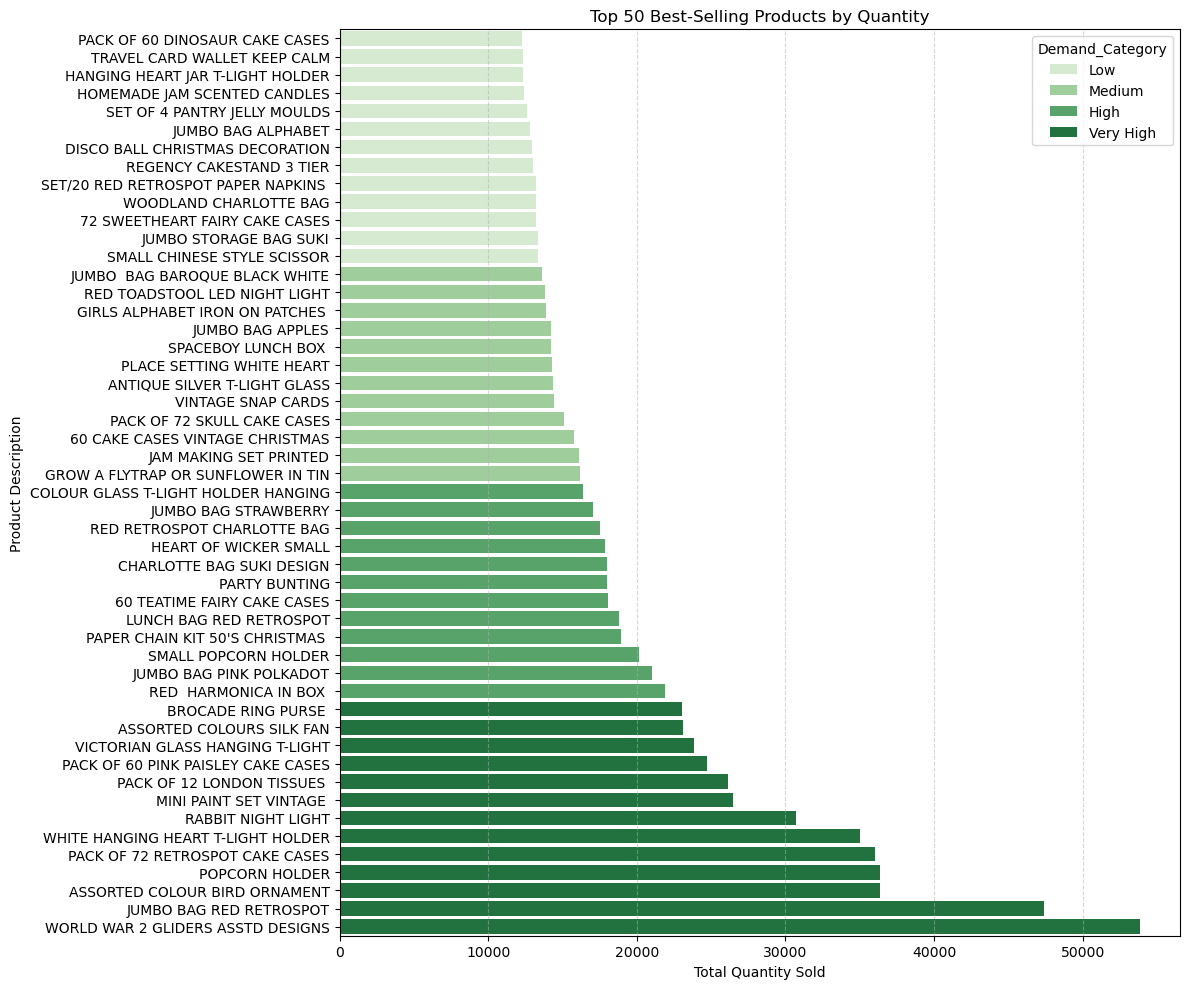

In [103]:
top_50_by_quantity_sorted = top_50_by_quantity.sort_values(by='Quantity', ascending=True)

plt.figure(figsize=(12, 10))
sns.barplot(
    data=top_50_by_quantity_sorted,
    x='Quantity',
    y='Description',
    hue='Demand_Category',
    palette='Greens'
)

plt.title('Top 50 Best-Selling Products by Quantity')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Description')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

This plot sorts products to different `Demand_Categories`, which were previously defined based on the quartiles of quantity sold. 

Products labeled as `Very High Demand` can be viewed as the company’s primary volume drivers. As such, the company should prioritize these items when making inventory decisions or designing promotional strategies.

In [195]:
top_52_by_revenue = (
    df_positive_price.groupby(['StockCode', 'Description'])
    .agg(
        UnitPrice=('UnitPrice', 'mean'),
        Quantity=('Quantity', 'sum'),
        Revenue=('Quantity', lambda x: (x * df_positive_price.loc[x.index, 'UnitPrice']).sum())
    )
    .sort_values(by='Revenue', ascending=False)
    .head(52)
    .reset_index()
)

top_52_by_revenue

,StockCode,Description,UnitPrice,Quantity,Revenue
0,DOT,DOTCOM POSTAGE,291.728515,705,206245.48
1,22423,REGENCY CAKESTAND 3 TIER,13.812834,13022,164762.19
2,47566,PARTY BUNTING,5.781935,18018,98302.98
3,85123A,WHITE HANGING HEART T-LIGHT HOLDER,3.109643,35021,97715.99
4,85099B,JUMBO BAG RED RETROSPOT,2.473701,47359,92356.03
5,23084,RABBIT NIGHT LIGHT,2.375385,30680,66756.59
6,POST,POSTAGE,37.051494,3003,66230.64
7,22086,PAPER CHAIN KIT 50'S CHRISTMAS,3.351157,18902,63791.94
8,84879,ASSORTED COLOUR BIRD ORNAMENT,1.722032,36381,58959.73
9,79321,CHILLI LIGHTS,6.774675,10226,53768.06


Note that there are items named 'DOTCOM POSTAGE' and 'POSTAGE', these are likely to be shipping and handling charges rather than actual merchandize sales. 

These are to be removed.

In [106]:
top_50_by_revenue = top_52_by_revenue[~top_52_by_revenue['Description'].str.contains('POSTAGE')]

Given that there are two non-product items to be removed, I adjusted my previous code to select the top 52 products. This allows me to filter out those two entries and retain the top 50 actual products.

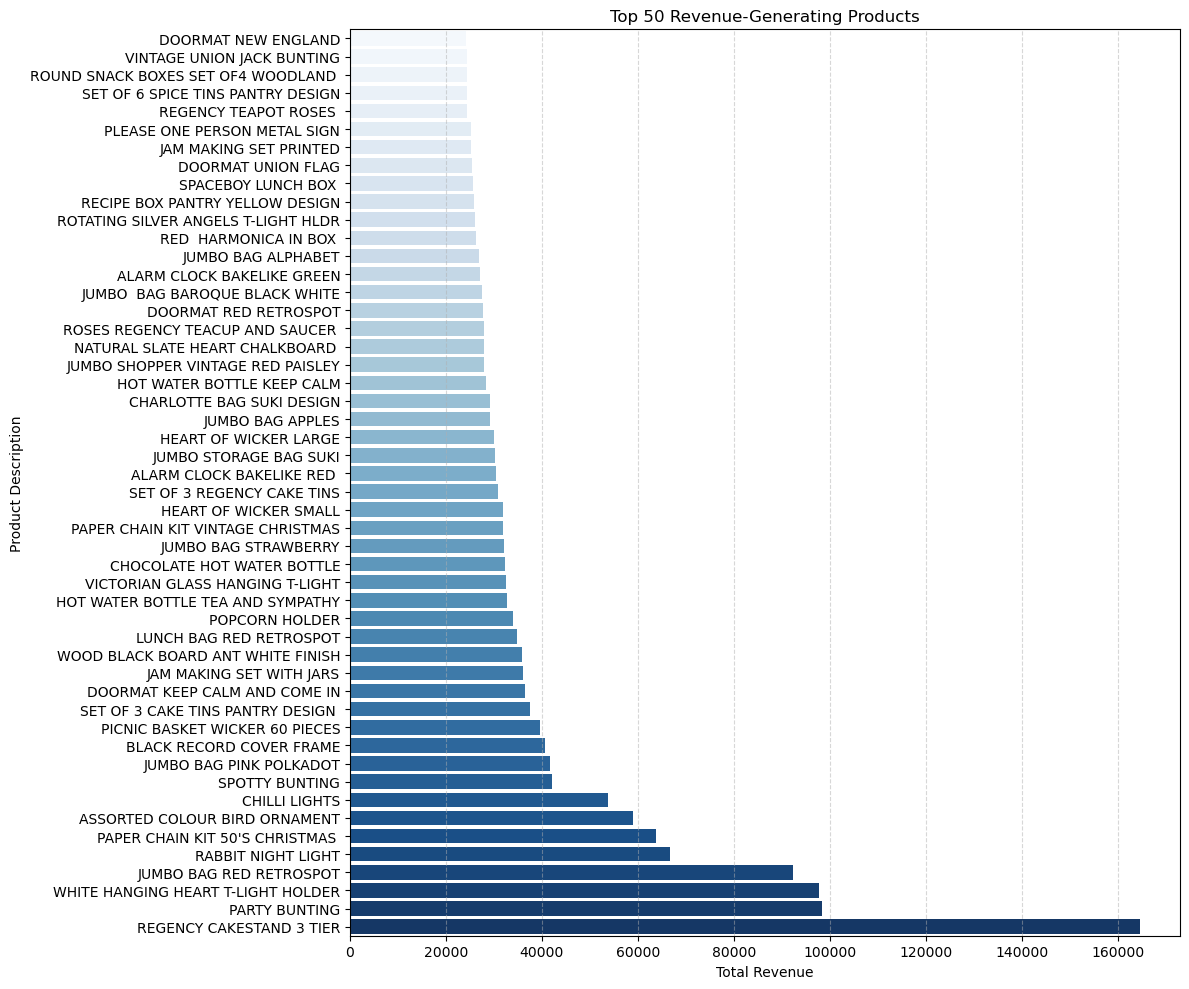

In [107]:
top_50_by_revenue_sorted = top_50_by_revenue.sort_values(by='Revenue', ascending=True)

plt.figure(figsize=(12, 10))
sns.barplot(
    data=top_50_by_revenue_sorted,
    x='Revenue',
    y='Description',
    hue='Description',
    palette='Blues'
)

plt.title('Top 50 Revenue-Generating Products')
plt.xlabel('Total Revenue')
plt.ylabel('Product Description')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

This plot reveals that while a few products generate significantly higher revenue, the remaining top sellers maintain a relatively balanced share of the total revenue. 

This suggests that products like the 3-tier cakestand are highly competitive in the market. Given their strong performances, it would be beneficial for the company to dive deeper into understanding these products — potentially launching complementary products, devising bundled sales strategies, or crafting targeted campaigns around them.

On the other hand, the even distribution of revenue across the majority of products indicates a diversified product portfolio. This is a positive sign, as it suggests the company is not overly reliant on a small number of high-performing products. This minimizes the risks associated with market fluctuations or shifts in consumer preferences, making the company more resilient to revenue volatility.

In [199]:
top_50_total_revenue = top_50_by_revenue['Revenue'].sum()

df_positive_price.loc[:, 'Revenue'] = df_positive_price['UnitPrice'] * df_positive_price['Quantity']
total_revenue = df_positive_price['Revenue'].sum()

top_50_as_a_percentage = top_50_total_revenue/total_revenue

top_50_as_a_percentage

0.2017609196010869

The fact that the 50 top revenue grossers contribute to only 20% of the company's total revenue further confirms the company's diversified product portfolio and balanced sources of revenue, which is a strength in terms of risk management.

## Sales Trend Analysis

In [201]:
df_positive_price.loc[:, 'Revenue'] = df_positive_price.loc[:, 'UnitPrice'] * df_positive_price.loc[:, 'Quantity']
df_positive_price.loc[:, 'YearMonth'] = df_positive_price.loc[:, 'InvoiceDate'].dt.to_period('M')

`Revenue` and `YearMonth` columns are added for subsequent calculations.

In [113]:
df_positive_price

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,YearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011-12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011-12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12


In [203]:
monthly_revenue = (
    df_positive_price.groupby('YearMonth')['Revenue']
    .sum()
    .sort_index(ascending=True)
)

monthly_revenue

YearMonth
2010-12     748957.020
2011-01     560000.260
2011-02     498062.650
2011-03     683267.080
2011-04     493207.121
2011-05     723333.510
2011-06     691123.120
2011-07     681300.111
2011-08     704804.630
2011-09    1019687.622
2011-10    1070704.670
2011-11    1461756.250
2011-12     433668.010
Freq: M, Name: Revenue, dtype: float64

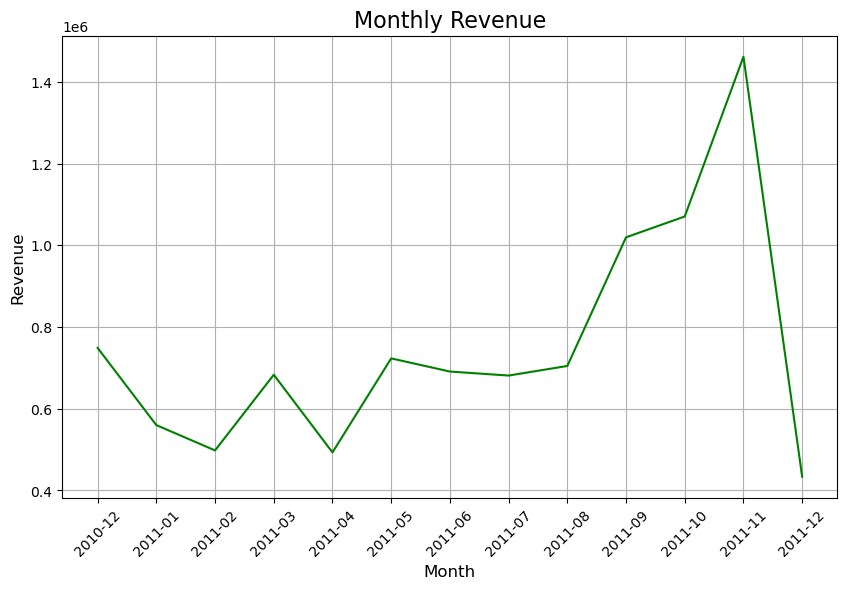

In [116]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_revenue.index.astype(str), y=monthly_revenue.values, color='g')

plt.title('Monthly Revenue', fontsize=16)
plt.xlabel('Month', fontsize=12) 
plt.ylabel('Revenue', fontsize=12) 
plt.xticks(rotation=45)

plt.grid(True)


There is a significant anomaly in the plot: the revenue for 2011-12 is abnormally low. 

It's crucial to find out the reason for this to ensure the integrity of the analysis.

In [117]:
df_positive_price[df_positive_price['YearMonth'] == '2011-12']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,YearMonth
516384,C579889,23245,SET OF 3 REGENCY CAKE TINS,-8,2011-12-01 08:12:00,4.15,13853.0,United Kingdom,-33.20,2011-12
516385,C579890,84947,ANTIQUE SILVER TEA GLASS ENGRAVED,-1,2011-12-01 08:14:00,1.25,15197.0,United Kingdom,-1.25,2011-12
516386,C579890,23374,RED SPOT PAPER GIFT BAG,-1,2011-12-01 08:14:00,0.82,15197.0,United Kingdom,-0.82,2011-12
516387,C579890,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,-2,2011-12-01 08:14:00,0.85,15197.0,United Kingdom,-1.70,2011-12
516388,C579891,23485,BOTANICAL GARDENS WALL CLOCK,-1,2011-12-01 08:18:00,25.00,13644.0,United Kingdom,-25.00,2011-12
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011-12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011-12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12


The sales record for 2011-12 has been filtered out. Sorting the data in descending order reveals that the available records only go up to 2011-12-09, indicating that the data for the entire month is incomplete. This is why the revenue for December 2011 is unusually low.

Since the available data is insufficient to make an informed prediction about the full month's revenue, I have decided to exclude December 2011 from the plot to avoid potential bias or inaccuracies in the analysis.

In [207]:
monthly_revenue_filtered = monthly_revenue[monthly_revenue.index != '2011-12']

monthly_revenue_filtered_rounded = monthly_revenue_filtered.round(1)

monthly_revenue_filtered_rounded

YearMonth
2010-12     748957.0
2011-01     560000.3
2011-02     498062.6
2011-03     683267.1
2011-04     493207.1
2011-05     723333.5
2011-06     691123.1
2011-07     681300.1
2011-08     704804.6
2011-09    1019687.6
2011-10    1070704.7
2011-11    1461756.2
Freq: M, Name: Revenue, dtype: float64

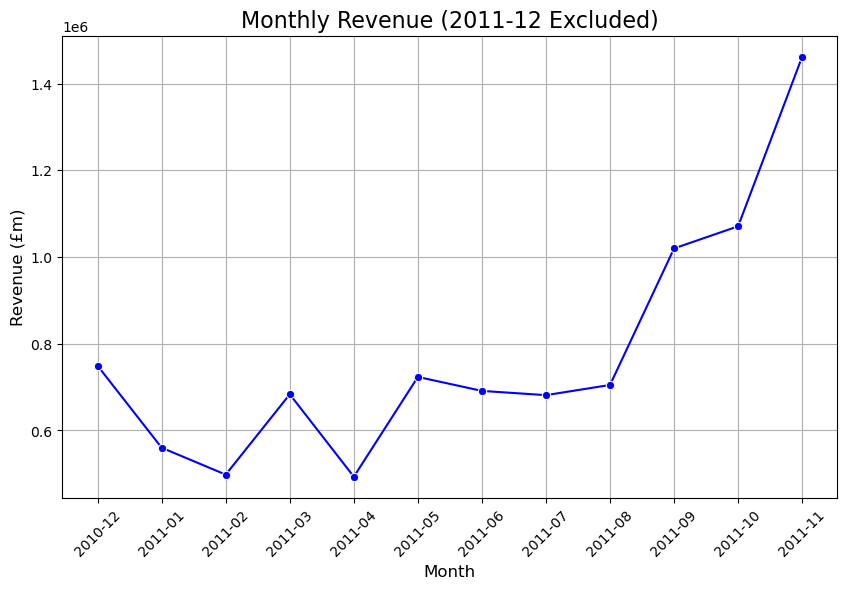

In [122]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_revenue_filtered.index.astype(str), y=monthly_revenue_filtered.values, marker='o', color='b', markersize=6)

plt.title('Monthly Revenue (2011-12 Excluded)', fontsize=16)
plt.xlabel('Month', fontsize=12) 
plt.ylabel('Revenue (£m)', fontsize=12) 
plt.xticks(rotation=45)

plt.grid(True)

The monthly revenue shows an overall upward trend with some fluctuations. 

- The revenue drop from £0.75m to £0.5m from 2010-12 to 2011-02 is likely to be due to seasonality, as customers typically restrain from making as many purchases as they do during the hoilday season. If this trend is consistent with previous years, the decline may not be alarming. However, the company should assess the magnitude of the fall compared to prvious years. If the decline is more significant, the company may need to investigate other potential causes, such as inventory issues, marketing strategies, or external factors that could have contributed to lower sales.
- March 2011 saw an increase in revenue to £0.68m, which is likely driven by a combination of a shift in customer behavior and a successful marketing campaigne if one _was_ implemented. If this is the case, then the company could look into the campaign that contributed to the higher revenue and draw insights from it.
- The fall in revenue to £0.49m in April can be unexpected and may require a closer examination. The company should investigate potential causes, for example, a less successful marketing campaign, a shift in consumer preferences, or intensified competition. Identifying and addressing these factors will be key to avoiding unforseen declines and ensuring a more stable revenue flow in the future. 
- The revenue is recovered to £0.72m in May 2011, which may be an indication that the company took effective action based on the insights gathered from the April dip. It may be worthwhile to examine the strategies implemented in May — whether adjustments were made in marketing, inventory management, or product offerings — to understand the steps that contributed to the revenue restoration.
- Revenue remained stable from May to August 2011 at around £0.7m, suggesting that the company’s strategies for maintaining consistent sales were effective. The company should assess the factors that contributed to this stability and consider applying them to other periods.
- The following months of September to November witnessed a significant surge in revenue from £0.7m to £1.46m, which is worth further investigation. The company can analyze this spike to uncover the factors that led to the increase — whether it was a result of a successful promotion, a new product launch, or seasonal demand. By identifying the drivers of this surge, the company can use the insights to plan for future growth.

## Customer Analysis

In [208]:
df_positive_price_filtered = df_positive_price.dropna(subset=['CustomerID'])

df_positive_price_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406789 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406789 non-null  object        
 1   StockCode    406789 non-null  object        
 2   Description  406789 non-null  object        
 3   Quantity     406789 non-null  int64         
 4   InvoiceDate  406789 non-null  datetime64[ns]
 5   UnitPrice    406789 non-null  float64       
 6   CustomerID   406789 non-null  float64       
 7   Country      406789 non-null  object        
 8   Revenue      406789 non-null  float64       
 9   YearMonth    406789 non-null  period[M]     
dtypes: datetime64[ns](1), float64(3), int64(1), object(4), period[M](1)
memory usage: 34.1+ MB


Recall from before that there are entries without `CustomerID` values, which need to be removed for a customer analysis.

In [209]:
revenue_by_customer = (
    df_positive_price_filtered.groupby('CustomerID')
    .agg(
        Revenue = ('Revenue', 'sum'),
        Invoice_Count = ('InvoiceNo', 'nunique'),
        Country = ('Country', 'first')
    )
    .reset_index()
    .sort_values(by='Revenue', ascending=False)
)

revenue_by_customer['CustomerID'] = revenue_by_customer['CustomerID'].astype('Int64')     #Convert CustomerIDs to integers to remove decimal places
revenue_by_customer['Revenue'] = round(revenue_by_customer['Revenue'], 1)     #Round revenue values to 1 decimal place

revenue_by_customer

,CustomerID,Revenue,Invoice_Count,Country
1702,14646,279489.0,76,Netherlands
4232,18102,256438.5,62,United Kingdom
3757,17450,187482.2,55,United Kingdom
1894,14911,132572.6,248,EIRE
55,12415,123725.4,26,Australia
...,...,...,...,...
125,12503,-1126.0,1,Spain
3869,17603,-1165.3,5,United Kingdom
1383,14213,-1192.2,1,United Kingdom
2235,15369,-1592.5,1,United Kingdom


In [219]:
country_counts = revenue_by_customer['Country'].value_counts()

country_counts = country_counts.reset_index()

country_counts.columns = ['Country', 'Count']

total_customers = country_counts['Count'].sum()

country_counts['Percentage'] = (country_counts['Count'] / total_customers) * 100

country_counts

,Country,Count,Percentage
0,United Kingdom,3949,90.345459
1,Germany,95,2.173416
2,France,87,1.990391
3,Spain,29,0.663464
4,Belgium,24,0.549073
5,Switzerland,20,0.457561
6,Portugal,19,0.434683
7,Italy,15,0.343171
8,Finland,12,0.274537
9,Norway,10,0.228781


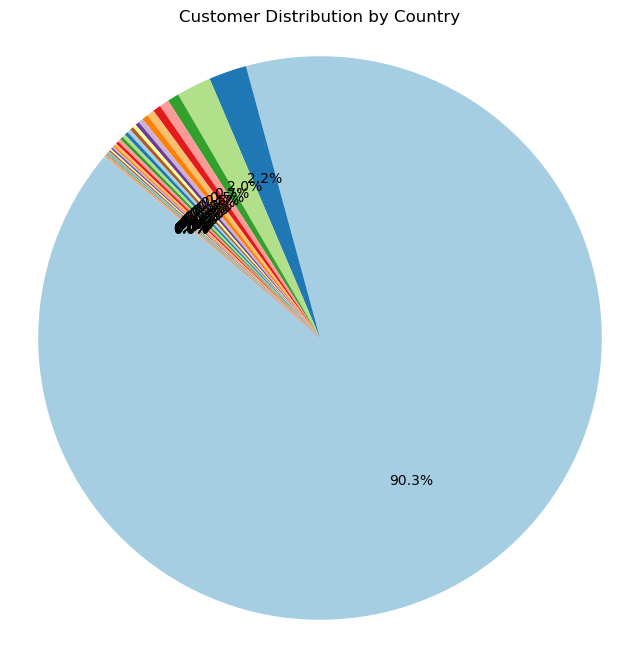

In [211]:
plt.figure(figsize=(8, 8)) 
plt.pie(country_counts['Percentage'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

plt.title('Customer Distribution by Country')
plt.axis('equal')
plt.show()

This pie chart demonstrates the composition of the company's customers by country. 

* 90.3% of the customers are based in the UK, highlighting a significant domestic customer base. This implies that the company's marketing strategies have been and should continue to be targeted to UK customers. Strategies such as those aimed at increasing brand loyalty may be particularly effective within this market.

* Customers from overseas constitutes 9.7% of the population. While this is a smaller segment, there may be potential growth opportunities. A more detailed analysis of these customers will be crucial in determining whether a decision to invest in overseas expansion is justified.

* Germany and France emerge as the most significant foreign markets, contributing 2.2% and 2.0% to the total customer base, respectively. This is likely to stem from the long-standing trade relationships between the UK and EU countries as well as their geographical proximity. This indicates that there may be profits to be gained for the company to prioritize major EU countries in their expansion.

In [212]:
top_50_customers = revenue_by_customer.head(50)

top_50_customers

,CustomerID,Revenue,Invoice_Count,Country
1702,14646,279489.0,76,Netherlands
4232,18102,256438.5,62,United Kingdom
3757,17450,187482.2,55,United Kingdom
1894,14911,132572.6,248,EIRE
55,12415,123725.4,26,Australia
1344,14156,113384.1,66,EIRE
3800,17511,88125.4,46,United Kingdom
3201,16684,65892.1,31,United Kingdom
1004,13694,62653.1,60,United Kingdom
2191,15311,59419.3,118,United Kingdom


`top_50_customers` returns the customers contributing the highest revenues. Thses are the most valuable customers to the company. 

* First of all, it’s notable that the highest revenue-generating customer is based in the Netherlands, which points to the potential for overseas customers to contribute significantly to the company’s overall revenue. A possible cause for this is a gap in product offerings between the UK and international markets. The company could investigate into this gap and cater for the specific needs of overseas customers, hence attract more customers and drive growth.

* Additionally, while Ireland (EIRE) and Australia do not appear in the top 10 for customer volume, they are home to three of the most valuable customers, showcasing the great potential of these two markets. The company should consider targeting these regions for expansion, but in the meantime make sure that such expansions do not harm the interests or satisfaction of the existing high-value clients.

* Finally, within the top 50, there is a clear distinction in purchasing behavior. Some customers contribute substantial revenue through occasional high-value orders, while others generate similar totals with frequent, smaller purchases. This difference calls for a tailored approach to customer engagement. For customers who make frequent but smaller purchases, the company could implement strategies to maintain regular communication and achieve a stable and potentially larger cash flow from them. Conversely, customers who place high-value orders occasionally may benefit more from personalized offers and tailored product recommendations.

In [222]:
country_counts_top_50 = top_50_customers['Country'].value_counts()

country_counts_top_50 = country_counts_top_50.reset_index()

country_counts_top_50.columns = ['Country', 'Count']

country_counts_top_50['Percentage'] = country_counts_top_50['Count'] / 50 * 100

country_counts_top_50

,Country,Count,Percentage
0,United Kingdom,41,82.0
1,EIRE,2,4.0
2,France,2,4.0
3,Netherlands,1,2.0
4,Australia,1,2.0
5,Sweden,1,2.0
6,Japan,1,2.0
7,Germany,1,2.0


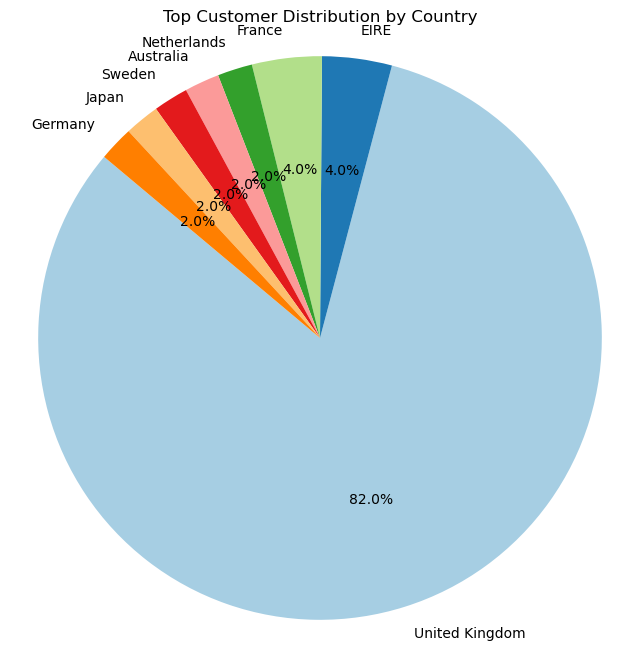

In [226]:
plt.figure(figsize=(8, 8)) 
plt.pie(country_counts_top_50['Percentage'], autopct='%1.1f%%', labels=country_counts_top_50['Country'] ,startangle=140, colors=plt.cm.Paired.colors)

plt.title('Top Customer Distribution by Country')
plt.axis('equal')
plt.show()

The arguement in favor of overseas expansion becomes more compelling when we focus on the distribution of the high-value customers.

The proportion of UK-based customers drops to 82% within the top revenue-generating customers, compared to 90% when considering the entire customer base. 

This shift highlights the relative value of overseas customers in the top segment. It suggests that while the UK remains the primary market, overseas customers represent a disproportionately higher revenue contribution. This implies a growth opportunity for the company to target international markets.

However, although the overseas markets show promising potentials, 82% of the high-value customers _are_ from the UK, which reinforces the importance of the UK market and the necessity to allocate the majority of its resources towards maintaining a strong and stable market share in the UK. 

## Conclusion

This analysis provides insights into the company's products, sales trends, and customers, offering a comprehensive understanding of the current market dynamics and opportunities for growth.

Product Analysis reveals that a small number of products, such as the 3-tier cakestand, generates significantly higher revenues, indicating that these products are highly competitive in the market. The company should explore strategies like launching complementary products, bundling sales, or running targeted campaigns to capitalize on their success. At the same time, the even distribution of revenue across most products suggests a diversified product portfolio, meaning that the company is not overly reliant on some specific products to drive revenue, which strengthens its ability to overcome market fluctuations or sudden shifts in consumer preferences.

Sales Trend Analysis shows an upward revenue trajectory with some fluctuations, likely due to seasonality. The drop in revenue from December 2010 to February 2011 may indicate a typical post-holiday slowdown, though any deviations from historical trends should be further investigated. Revenue spikes, such as in March 2011, should be analyzed for insights into successful campaigns or changes in strategies. The stable revenue between May and August 2011 implies productive strategic decisions, while the significant surge from September to November calls for further examination to uncover the drivers behind this growth apart from seasonal factors, which could inform future decisions.

Customer Analysis highlights the dominance of the UK market, with 82% of high-value customers based in the UK, underscoring the importance of continuing to focus resources to maintain a strong position domestically. However, overseas markets - in particular, the Netherlands, Ireland, Australia, Germany, and France — show potential for growth, with high-value international customers contributing disproportionately to total revenue. The company may consider targeted expansion into these regions and capitalize on the potential gap in product offerings between the UK and the international markets.

The company can be better informed by continually building on the insights gained. For instance, focusing specifically on the sales trends of best-selling products can reveal demand patterns over time and direct inventory planning accordingly. Analyzing products with lower performance may highlight areas for improvement or opportunities to enhance their appeal. Additionally, a deeper dive into customer purchasing behavior could provide the foundation for more personalized engagement strategies and drive higher revenues. Leveraging these data-driven insights will help the company stays competitive and achieve sustained growth.